## Hotel Reservations Classification Using Light Gradient Boosting and XGBoost (95% Accuracy)
Kevin Putra Santoso, Department of Information Technology

Sepuluh Nopember Institute of Technology

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Dataset, EDA, and Preprocessing

In [3]:
df = pd.read_csv('hotel_reservations.csv')
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [4]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

We should drop the 'Booking_ID' variable to avoid overfitting. Then, let's see the elements of every columns. We need to check whether a column is categorical or numerical.

In [6]:
df = df.drop(columns='Booking_ID')

In [8]:
for i in df.columns:
  print(f'Value counts dari variabel {i}')
  print(df[i].value_counts())

Value counts dari variabel no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64
Value counts dari variabel no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64
Value counts dari variabel no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64
Value counts dari variabel no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64
Value counts dari variabel type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
Value counts dari variabel required_car_parking_space
0    35151
1     1124


In [9]:
numericalFeatures = ['no_of_adults', 'no_of_children', 'no_of_week_nights',
                     'no_of_week_nights', 'lead_time', 'arrival_date',
                     'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                     'avg_price_per_room']

categoricalFeatures = ['type_of_meal_plan', 'required_car_parking_space',
                       'no_of_special_requests', 'room_type_reserved', 'arrival_year',
                       'arrival_month', 'market_segment_type', 'repeated_guest', 'booking_status']

Let's define our function for standardization/normalization, and to handle categorical features with label encoding. The reason why we use label encoding instead of one-hot encoding is to avoid memory overleak since there are so many data in this dataset.

In [10]:
from sklearn.preprocessing import LabelEncoder

def MinMax(X, features=numericalFeatures):
  for i in features:
    X[i] = (X[i] - min(X[i])) / (max(X[i]) - min(X[i]))
  return X

def StandardScaling(X, features=numericalFeatures):
  for i in features:
    X[i] = (X[i] - np.mean(X[i])) / np.std(X[i])
  return X

def LabelEncoding(X, features=categoricalFeatures):
  le = LabelEncoder()
  for i in features:
    X[i] = le.fit_transform(X[i])
  return X

Let's see the distribution of each columns. If you see the histograms down below, most columns are non-normally distributed. I've decided to use Standardization for feature scaling since it works well with XGBoost.

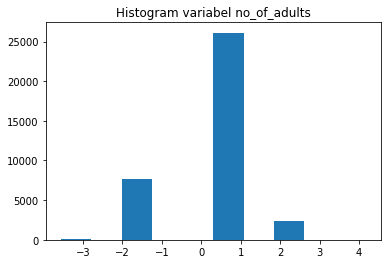

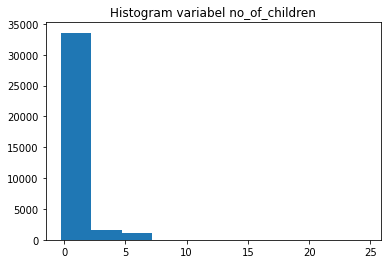

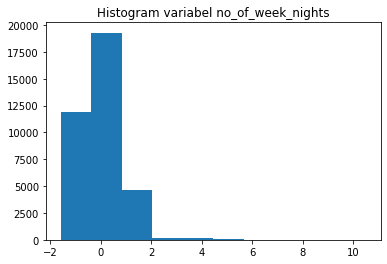

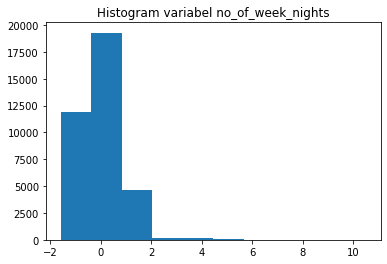

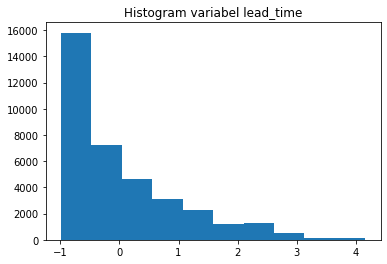

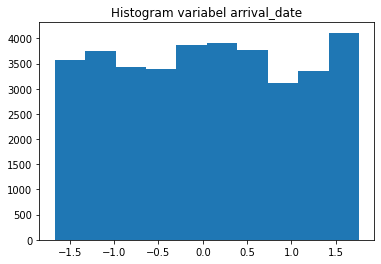

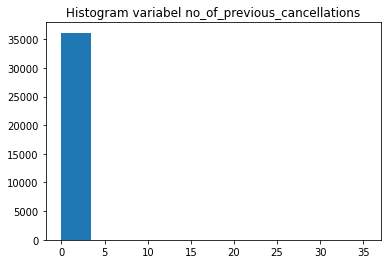

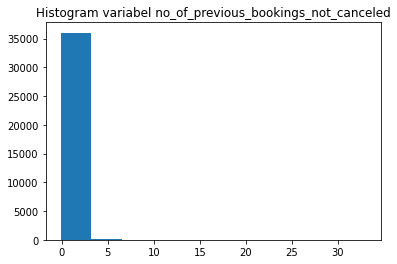

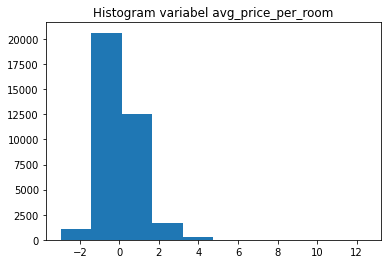

In [47]:
for i in numericalFeatures:
  plt.title(f'Histogram variabel {i}')
  plt.hist(df[i])
  plt.show()

In [48]:
df = StandardScaling(df)
df = LabelEncoding(df)

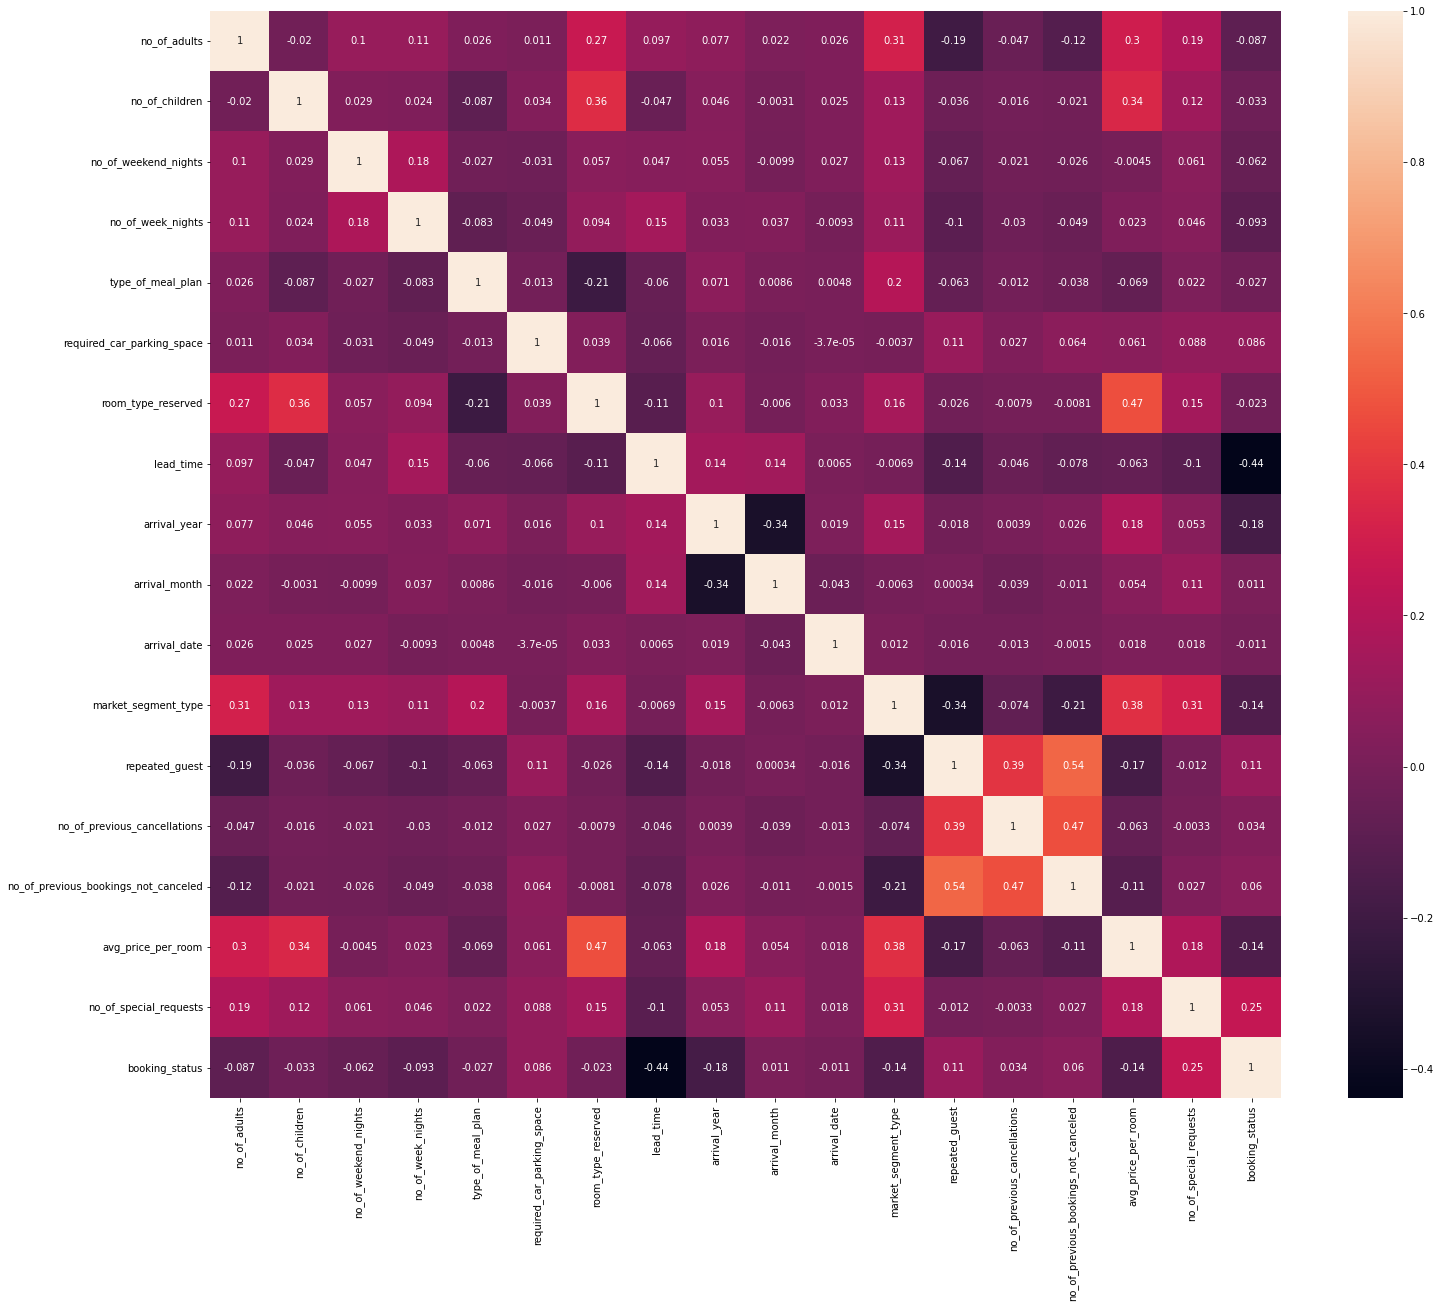

In [49]:
plt.figure(figsize=(24,20))
sns.heatmap(df.corr(), annot=True)

In [50]:
X = df.drop(columns='booking_status')
y = df['booking_status']

## Split The Dataset

Here I'm going to split it with ratio 7:3 and random state 142.

In [51]:
from sklearn.model_selection import train_test_split

X_test, y_test = X[35000:], y[35000:]
X_train, X_val, y_train, y_val = train_test_split(X[35000:], y[35000:], test_size=0.3, random_state=142)

## Building Models, Hyperparameter Tuning, and Prediction
There are two models that I'm going to use here, those are LGBM and XGBoost. These powerful models tends to give high accuracy prediction since they are able to handle imbalanced data.

A. Light Gradient Boosting


 * Initiating LGBMTuner.fit
     . Settings:
     .. Trying 100 trials
     .. Evaluation metric: f1 
     .. Study direction: minimize log_loss

     . Trial number: 0 finished
     .. Optimization score (lower-better): log_loss: 0.23316009736296053
     .. Evaluation score (greater-better): f1: 0.9297441453454455
 ...........................................................................
     . Trial number: 1 finished
     .. Optimization score (lower-better): log_loss: 0.24173743283516674
     .. Evaluation score (greater-better): f1: 0.928059950041632
 ...........................................................................
     . Trial number: 2 finished
     .. Optimization score (lower-better): log_loss: 0.24603896351996352
     .. Evaluation score (greater-better): f1: 0.9229222520107239
 ...........................................................................
     . Trial number: 3 finished
     .. Optimization score (lower-better): log_loss: 0.2395816202782633
     .

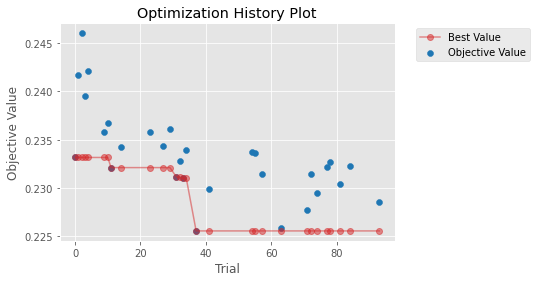

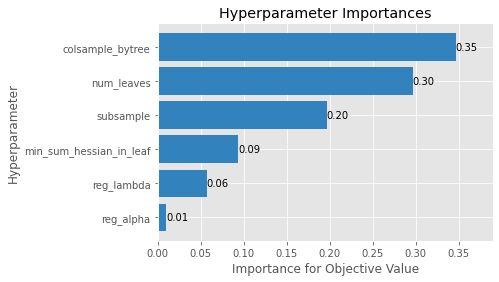

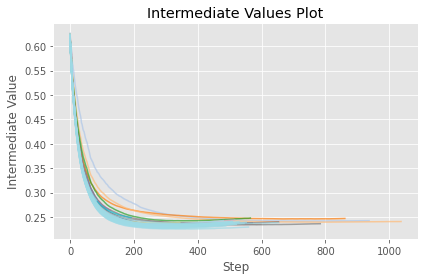

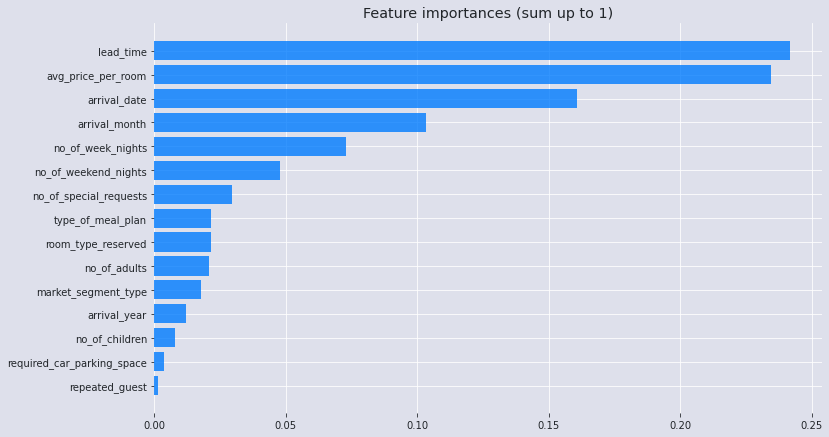


     . Optuna hyperparameters optimization finished
     .. Best trial number:37    |     log_loss:          0.22554481852312874
 ---------------------------------------------------------------------------
     . n_estimators optimization finished
     .. best iteration:  383   |     f1:           0.9289217723834068

Time elapsed for fit execution: 4 min 53.882 sec
[[366  89]
 [ 42 778]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       455
           1       0.90      0.95      0.92       820

    accuracy                           0.90      1275
   macro avg       0.90      0.88      0.89      1275
weighted avg       0.90      0.90      0.90      1275

Total false count: 131 
Accuracy: 0.897255


In [53]:
from verstack import LGBMTuner
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

tuner = LGBMTuner(metric = 'f1', 
                  n_thread=150)
tuner.fit(X[:35000], y[:35000])
y_pred = tuner.predict(X_test)

print(confusion_matrix(y_test.values,y_pred))
print(classification_report(y_test.values, y_pred))
false=[]
  
for i in range(len(y_test.values)):
      if y_test.values[i]!=y_pred[i]:
          false.append(i)
          
print("Total false count: %d "%len(false))  
print("Accuracy: %g"%accuracy_score(y_test.values, y_pred))

B. Extreme Gradient Boosting (XGBoost)

In [56]:
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

model_xgb = XGBClassifier(tree_method='gpu_hist',
                          max_depth=20,
                          learning_rate=0.15,
                          subsample=0.7,
                          colsample_bytree=0.7,
                          colsample_bylevel=0.7,
                          n_estimators=400                               
                          )
model_xgb.fit(X_train, y_train, eval_set=[(X_val,y_val)])

[0]	validation_0-error:0.224543
[1]	validation_0-error:0.219321
[2]	validation_0-error:0.21671
[3]	validation_0-error:0.214099
[4]	validation_0-error:0.211488
[5]	validation_0-error:0.190601
[6]	validation_0-error:0.193211
[7]	validation_0-error:0.182768
[8]	validation_0-error:0.172324
[9]	validation_0-error:0.164491
[10]	validation_0-error:0.174935
[11]	validation_0-error:0.172324
[12]	validation_0-error:0.177546
[13]	validation_0-error:0.164491
[14]	validation_0-error:0.174935
[15]	validation_0-error:0.167102
[16]	validation_0-error:0.169713
[17]	validation_0-error:0.177546
[18]	validation_0-error:0.172324
[19]	validation_0-error:0.185379
[20]	validation_0-error:0.174935
[21]	validation_0-error:0.172324
[22]	validation_0-error:0.169713
[23]	validation_0-error:0.164491
[24]	validation_0-error:0.167102
[25]	validation_0-error:0.167102
[26]	validation_0-error:0.159269
[27]	validation_0-error:0.164491
[28]	validation_0-error:0.164491
[29]	validation_0-error:0.164491
[30]	validation_0-err

XGBClassifier(colsample_bylevel=0.7, colsample_bytree=0.7, learning_rate=0.15,
              max_depth=20, n_estimators=400, subsample=0.7,
              tree_method='gpu_hist')

              precision    recall  f1-score   support

           0     0.9345    0.9099    0.9220       455
           1     0.9507    0.9646    0.9576       820

    accuracy                         0.9451      1275
   macro avg     0.9426    0.9373    0.9398      1275
weighted avg     0.9449    0.9451    0.9449      1275

Total false count: 70 
Accuracy: 0.945098


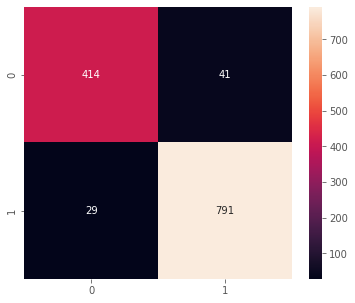

In [67]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred_xgb = model_xgb.predict(X_test)

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test.values,y_pred_xgb), annot=True, fmt=".0f")
print(classification_report(y_test.values,y_pred_xgb, digits=4))
false=[]
  
for i in range(len(y_test.values)):
      if y_test.values[i]!=y_pred_xgb[i]:
          false.append(i)
          
print("Total false count: %d "%len(false))  
print("Accuracy: %g"%accuracy_score(y_test.values, y_pred_xgb))

There is a model that can be useful for XGBoost feature selection called BoostARoota. I'm going to use it here and see if it can increase my classification accuracy.

In [68]:
!pip install boostaroota

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
from boostaroota import BoostARoota

print("==== Feature Selection ====")
br = BoostARoota(clf=model_xgb, iters=10)
br.fit(X_train,y_train)
features = list(br.keep_vars_)
print("Selected Features:")
print(features)
print("Total features: %d"%len(features))

==== Feature Selection ====
Round:  1  iteration:  1
Round:  1  iteration:  2
Round:  1  iteration:  3
Round:  1  iteration:  4
Round:  1  iteration:  5
Round:  1  iteration:  6
Round:  1  iteration:  7
Round:  1  iteration:  8
Round:  1  iteration:  9
Round:  1  iteration:  10
Round:  2  iteration:  1
Round:  2  iteration:  2
Round:  2  iteration:  3
Round:  2  iteration:  4
Round:  2  iteration:  5
Round:  2  iteration:  6
Round:  2  iteration:  7
Round:  2  iteration:  8
Round:  2  iteration:  9
Round:  2  iteration:  10
BoostARoota ran successfully! Algorithm went through  2  rounds.
Selected Features:
['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'avg_price_per_room', 'no_of_special_requests']
Total features: 14


In [71]:
X_train = X_train[features]
X_val = X_val[features]
X_test = X_test[features]

In [72]:
model_xgb.fit(X_train, y_train)
y_pred_xgb_bsta = model_xgb.predict(X_test)

              precision    recall  f1-score   support

           0     0.9372    0.9187    0.9279       455
           1     0.9554    0.9659    0.9606       820

    accuracy                         0.9490      1275
   macro avg     0.9463    0.9423    0.9442      1275
weighted avg     0.9489    0.9490    0.9489      1275

Total false count: 65 
Accuracy: 0.94902


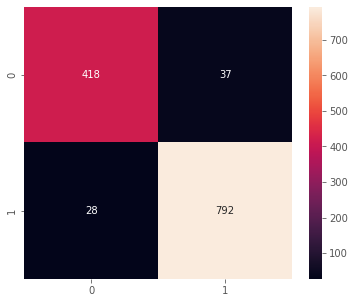

In [73]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test.values,y_pred_xgb_bsta), annot=True, fmt=".0f")
print(classification_report(y_test.values,y_pred_xgb_bsta, digits=4))
false=[]
  
for i in range(len(y_test.values)):
      if y_test.values[i]!=y_pred_xgb_bsta[i]:
          false.append(i)
          
print("Total false count: %d "%len(false))  
print("Accuracy: %g"%accuracy_score(y_test.values, y_pred_xgb_bsta))

By using BoostARoota, there is slight difference of this classification report with the previous one. You can see that the total false count is reduced by five and the accuracy score is increased about 0.04, and that concludes this notebook.